In [1]:
import tensorflow as tf

In [2]:
import keras

Using TensorFlow backend.


In [7]:
import pandas as pd

In [8]:
import sklearn

In [9]:
import matplotlib

In [10]:
df = pd.read_csv('housepricedata.csv')

In [11]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [12]:
dataset = df.values

In [13]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [14]:
X = dataset[:,0:10]

In [16]:
Y = dataset[:,10]

In [17]:
from sklearn import preprocessing

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

/miniconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size = 0.3)

In [24]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)

In [25]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [26]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [39]:
model = Sequential([
    Dense(32, activation ='relu', input_shape =(10,)),
    Dense(32, activation ='relu'),
    Dense(1, activation ='sigmoid'),
])

In [40]:
Dense(32, activation ='relu', input_shape =(10,)), Dense(32, activation ='relu'), Dense(1, activation ='sigmoid'),

(<keras.layers.core.Dense at 0x1a2ba9fb38>,
 <keras.layers.core.Dense at 0x1a2bc8c240>)

In [41]:
model.compile(optimizer ='sgd',
              loss ='binary_crossentropy',
              metrics =['accuracy'])

In [47]:
hist = model.fit(X_train, Y_train,
          batch_size =32, epochs =100,
          validation_data = (X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 79us/step - loss: 0.2963 - acc: 0.8796 - val_loss: 0.2777 - val_acc: 0.9087
Epoch 2/100
1022/1022 [==============================] - 0s 64us/step - loss: 0.2962 - acc: 0.8787 - val_loss: 0.2817 - val_acc: 0.9087
Epoch 3/100
1022/1022 [==============================] - 0s 60us/step - loss: 0.2958 - acc: 0.8826 - val_loss: 0.2804 - val_acc: 0.9087
Epoch 4/100
1022/1022 [==============================] - 0s 67us/step - loss: 0.2947 - acc: 0.8826 - val_loss: 0.2824 - val_acc: 0.9087
Epoch 5/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.2940 - acc: 0.8855 - val_loss: 0.2899 - val_acc: 0.8995
Epoch 6/100
1022/1022 [==============================] - 0s 51us/step - loss: 0.2940 - acc: 0.8845 - val_loss: 0.2796 - val_acc: 0.9087
Epoch 7/100
1022/1022 [==============================] - 0s 54us/step - loss: 0.2927 - acc: 0.8836 - val_loss: 0.2849 - val_acc: 0.9041
E

1022/1022 [==============================] - 0s 61us/step - loss: 0.2698 - acc: 0.8904 - val_loss: 0.2537 - val_acc: 0.9132
Epoch 61/100
1022/1022 [==============================] - 0s 68us/step - loss: 0.2717 - acc: 0.8875 - val_loss: 0.2682 - val_acc: 0.8995
Epoch 62/100
1022/1022 [==============================] - 0s 60us/step - loss: 0.2706 - acc: 0.8904 - val_loss: 0.2562 - val_acc: 0.9041
Epoch 63/100
1022/1022 [==============================] - 0s 61us/step - loss: 0.2702 - acc: 0.8894 - val_loss: 0.2581 - val_acc: 0.9041
Epoch 64/100
1022/1022 [==============================] - 0s 60us/step - loss: 0.2701 - acc: 0.8894 - val_loss: 0.2528 - val_acc: 0.9132
Epoch 65/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.2699 - acc: 0.8914 - val_loss: 0.2538 - val_acc: 0.9132
Epoch 66/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.2686 - acc: 0.8865 - val_loss: 0.2668 - val_acc: 0.8995
Epoch 67/100
1022/1022 [==============================

In [48]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 68us/step


0.9041095890410958

In [50]:
import matplotlib.pyplot as plt

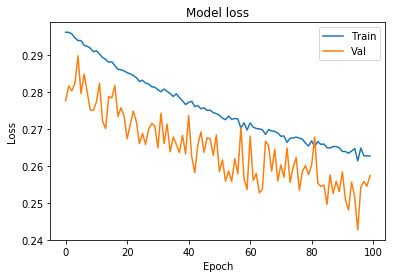

In [51]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

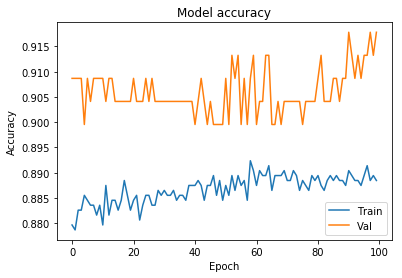

In [52]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [55]:
model_2 = Sequential([
    Dense(1000, activation ='relu', input_shape = (10,)),
    Dense(1000, activation ='relu'),
    Dense(1000, activation ='relu'),
    Dense(1000, activation ='relu'),
    Dense(1, activation ='sigmoid'),
])

In [56]:
model_2.compile(optimizer ='adam',
              loss ='binary_crossentropy',
              metrics = ['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size = 32, epochs = 100,
          validation_data = (X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4766 - acc: 0.7652 - val_loss: 0.4431 - val_acc: 0.8128
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3707 - acc: 0.8366 - val_loss: 0.3486 - val_acc: 0.8584
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3319 - acc: 0.8523 - val_loss: 0.3099 - val_acc: 0.8858
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2900 - acc: 0.8757 - val_loss: 0.3177 - val_acc: 0.8995
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2699 - acc: 0.8845 - val_loss: 0.3057 - val_acc: 0.9087
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2854 - acc: 0.8826 - val_loss: 0.2968 - val_acc: 0.8858
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2480 - acc: 0.8943 - val_loss: 0.2904 - val_acc: 0.9224
Epoch 8/

Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1655 - acc: 0.9325 - val_loss: 0.4644 - val_acc: 0.8584
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1649 - acc: 0.9384 - val_loss: 0.5227 - val_acc: 0.8813
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1601 - acc: 0.9286 - val_loss: 0.3420 - val_acc: 0.9041
Epoch 64/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1341 - acc: 0.9393 - val_loss: 0.3953 - val_acc: 0.8767
Epoch 65/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1571 - acc: 0.9315 - val_loss: 0.3331 - val_acc: 0.9041
Epoch 66/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1466 - acc: 0.9384 - val_loss: 0.4035 - val_acc: 0.8721
Epoch 67/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1345 - acc: 0.9501 - val_loss: 0.3730 - val_acc: 0.9041
Epoch 68/100
1022/1022 [========================

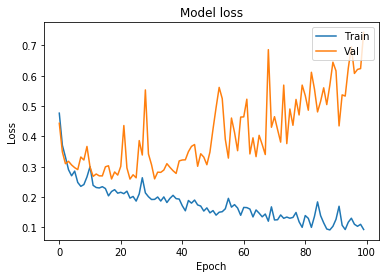

In [57]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc ='upper right')
plt.show()

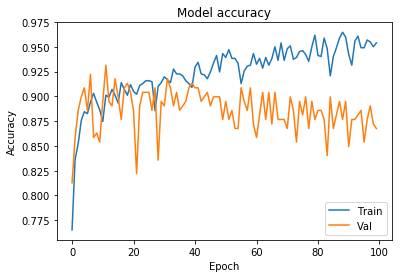

In [58]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [59]:
from keras.layers import Dropout
from keras import regularizers

In [60]:
model_3 = Sequential([
    Dense(1000, activation ='relu', kernel_regularizer = regularizers.l2(0.01), input_shape = (10,)),
    Dropout(0.3),
    Dense(1000, activation ='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation ='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation ='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation ='sigmoid', kernel_regularizer = regularizers.l2(0.01)),
])

In [61]:
model_3.compile(optimizer ='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size = 32, epochs = 100,
          validation_data = (X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 4s 4ms/step - loss: 14.2599 - acc: 0.6791 - val_loss: 3.8528 - val_acc: 0.8402
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.6870 - acc: 0.8170 - val_loss: 0.7630 - val_acc: 0.7900
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5906 - acc: 0.8542 - val_loss: 0.4861 - val_acc: 0.8995
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5237 - acc: 0.8523 - val_loss: 0.4772 - val_acc: 0.9132
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5029 - acc: 0.8620 - val_loss: 0.5254 - val_acc: 0.8311
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5053 - acc: 0.8620 - val_loss: 0.4395 - val_acc: 0.9087
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4907 - acc: 0.8679 - val_loss: 0.4311 - val_acc: 0.9087
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4453 - acc: 0.8757 - val_loss: 0.4071 - val_acc: 0.9178
Epoch 62/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.4512 - acc: 0.8689 - val_loss: 0.3992 - val_acc: 0.9361
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4502 - acc: 0.8894 - val_loss: 0.3975 - val_acc: 0.9178
Epoch 64/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.4503 - acc: 0.8679 - val_loss: 0.4534 - val_acc: 0.8904
Epoch 65/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4542 - acc: 0.8708 - val_loss: 0.4368 - val_acc: 0.8995
Epoch 66/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4320 - acc: 0.8826 - val_loss: 0.3957 - val_acc: 0.9269
Epoch 67/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4595 - acc: 0.8659 - val_loss: 0.4102 - val_acc: 0.8995
Epoch 68/100
1022/1022 [========================

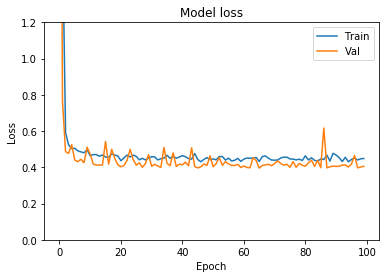

In [62]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc ='upper right')
plt.ylim(top = 1.2, bottom = 0)
plt.show()

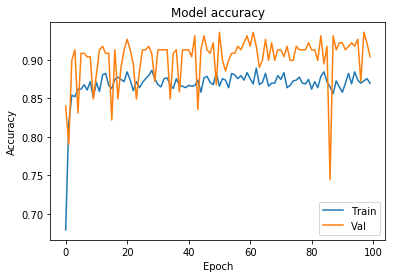

In [64]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()